In [2]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

In [3]:
key="3cf3e864d482454ae284accea58595c8eeb43ef0"

In [6]:
symbol = "TSLA"
df = pdr.get_data_tiingo(symbol, api_key=key)
df.to_csv(symbol + ".csv")
df=pd.read_csv(symbol + ".csv")

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2015-08-20 00:00:00+00:00,242.18,254.5600,241.90,252.06,4905757,242.18,254.5600,241.90,252.06,4905757,0.0,1.0
1,TSLA,2015-08-21 00:00:00+00:00,230.77,243.7999,230.51,236.00,6590234,230.77,243.7999,230.51,236.00,6590234,0.0,1.0
2,TSLA,2015-08-24 00:00:00+00:00,218.87,231.4000,195.00,202.79,9581585,218.87,231.4000,195.00,202.79,9581585,0.0,1.0
3,TSLA,2015-08-25 00:00:00+00:00,220.03,230.9000,219.12,230.52,4327294,220.03,230.9000,219.12,230.52,4327294,0.0,1.0
4,TSLA,2015-08-26 00:00:00+00:00,224.84,228.0000,215.51,227.93,4963042,224.84,228.0000,215.51,227.93,4963042,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,TSLA,2020-08-11 00:00:00+00:00,1374.39,1420.0000,1365.00,1396.00,8625834,1374.39,1420.0000,1365.00,1396.00,8625834,0.0,1.0
1253,TSLA,2020-08-12 00:00:00+00:00,1554.76,1585.0000,1435.00,1470.00,21898834,1554.76,1585.0000,1435.00,1470.00,21898834,0.0,1.0
1254,TSLA,2020-08-13 00:00:00+00:00,1621.00,1651.1800,1567.26,1611.00,20425308,1621.00,1651.1800,1567.26,1611.00,20425308,0.0,1.0
1255,TSLA,2020-08-14 00:00:00+00:00,1650.71,1668.8000,1626.64,1664.99,12577614,1650.71,1668.8000,1626.64,1664.99,12577614,0.0,1.0


In [8]:
df1=df.reset_index()['close']

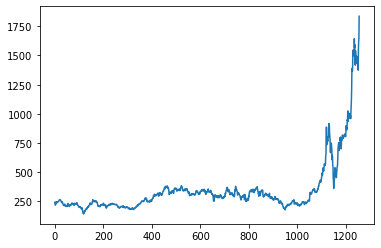

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 2s 155ms/step - loss: 0.0020 - val_loss: 0.0496
Epoch 2/10
12/12 [==============================] - 1s 99ms/step - loss: 6.8470e-04 - val_loss: 0.0279
Epoch 3/10
12/12 [==============================] - 1s 100ms/step - loss: 3.5581e-04 - val_loss: 0.0088
Epoch 4/10
12/12 [==============================] - 1s 99ms/step - loss: 1.9002e-04 - val_loss: 0.0050
Epoch 5/10
12/12 [==============================] - 1s 99ms/step - loss: 1.6666e-04 - val_loss: 0.0082
Epoch 6/10
12/12 [==============================] - 1s 99ms/step - loss: 1.6246e-04 - val_loss: 0.0063
Epoch 7/10
12/12 [==============================] - 1s 99ms/step - loss: 1.6312e-04 - val_loss: 0.0065
Epoch 8/10
12/12 [==============================] - 1s 99ms/step - loss: 1.5541e-04 - val_loss: 0.0069
Epoch 9/10
12/12 [==============================] - 1s 100ms/step - loss: 1.5938e-04 - val_loss: 0.0064
Epoch 10/10
12/12 [==============================] - 1s 101ms/step - loss:

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
math.sqrt(mean_squared_error(y_train,train_predict))

285.5189614336266

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

575.8300038813849

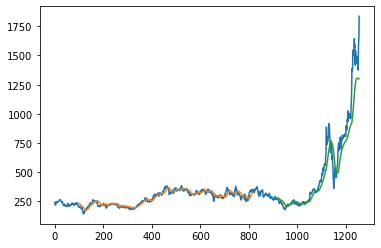

In [41]:


### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [42]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps= 100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.21185955 0.22478531 0.19970212 0.1836912  0.19878603 0.22019894
 0.23746284 0.23946642 0.25374563 0.29981619 0.33465132 0.3464364
 0.3555264  0.36065651 0.35620608 0.32095723 0.34778394 0.33213355
 0.3436704  0.38716999 0.36965785 0.38821019 0.37719936 0.32958622
 0.36497101 0.36912002 0.37761308 0.37611187 0.39938651 0.39458146
 0.39347033 0.38256588 0.38987689 0.38741822 0.39596447 0.3926429
 0.39710515 0.40422112 0.39788531 0.39906145 0.39986525 0.39134264
 0.40859472 0.44588852 0.43611293 0.43694037 0.42595909 0.43853614
 0.47651554 0.47104854 0.5209194  0.49006188 0.46786291 0.50073583
 0.49555252 0.50126184 0.50845464 0.5066461  0.50275714 0.5071662
 0.48297547 0.49782798 0.48231943 0.51164028 0.55328404 0.57681874
 0.62943787 0.725728   0.73653197 0.72235914 0.73914431 0.82801705
 0.79989007 0.81155694 0.82882084 0.80200595 0.80212415 0.88614455
 0.8420303  0.85619721 0.80935241 0.75257245 0.82503236 0.78773264
 0.80110167 0.79423394 0.76070498 0.79276228 0.793944

12 day output [[0.62431127]]
13 day input [0.36065651 0.35620608 0.32095723 0.34778394 0.33213355 0.3436704
 0.38716999 0.36965785 0.38821019 0.37719936 0.32958622 0.36497101
 0.36912002 0.37761308 0.37611187 0.39938651 0.39458146 0.39347033
 0.38256588 0.38987689 0.38741822 0.39596447 0.3926429  0.39710515
 0.40422112 0.39788531 0.39906145 0.39986525 0.39134264 0.40859472
 0.44588852 0.43611293 0.43694037 0.42595909 0.43853614 0.47651554
 0.47104854 0.5209194  0.49006188 0.46786291 0.50073583 0.49555252
 0.50126184 0.50845464 0.5066461  0.50275714 0.5071662  0.48297547
 0.49782798 0.48231943 0.51164028 0.55328404 0.57681874 0.62943787
 0.725728   0.73653197 0.72235914 0.73914431 0.82801705 0.79989007
 0.81155694 0.82882084 0.80200595 0.80212415 0.88614455 0.8420303
 0.85619721 0.80935241 0.75257245 0.82503236 0.78773264 0.80110167
 0.79423394 0.76070498 0.79276228 0.79394434 0.7927741  0.79546919
 0.77367802 0.75350036 0.72738878 0.83399233 0.87314196 0.89070137
 1.         0.68811631

26 day output [[0.54588366]]
27 day input [0.37611187 0.39938651 0.39458146 0.39347033 0.38256588 0.38987689
 0.38741822 0.39596447 0.3926429  0.39710515 0.40422112 0.39788531
 0.39906145 0.39986525 0.39134264 0.40859472 0.44588852 0.43611293
 0.43694037 0.42595909 0.43853614 0.47651554 0.47104854 0.5209194
 0.49006188 0.46786291 0.50073583 0.49555252 0.50126184 0.50845464
 0.5066461  0.50275714 0.5071662  0.48297547 0.49782798 0.48231943
 0.51164028 0.55328404 0.57681874 0.62943787 0.725728   0.73653197
 0.72235914 0.73914431 0.82801705 0.79989007 0.81155694 0.82882084
 0.80200595 0.80212415 0.88614455 0.8420303  0.85619721 0.80935241
 0.75257245 0.82503236 0.78773264 0.80110167 0.79423394 0.76070498
 0.79276228 0.79394434 0.7927741  0.79546919 0.77367802 0.75350036
 0.72738878 0.83399233 0.87314196 0.89070137 1.         0.68811631
 0.68811631 0.69281524 0.69202948 0.68928695 0.68496686 0.67947733
 0.67318755 0.66639924 0.65934312 0.65218651 0.64504391 0.63799042
 0.63107109 0.6243112

In [56]:
day_new=np.arange(1,100)
day_pred=np.arange(101,131)

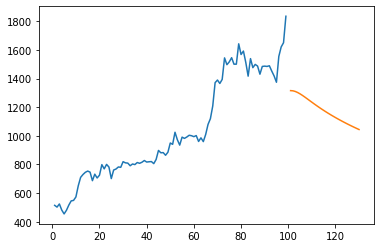

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

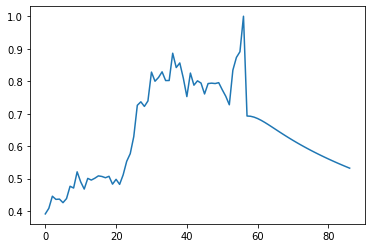

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

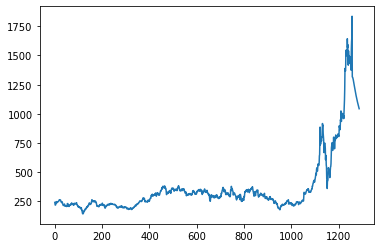

In [61]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)